In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the dataset
url = '/content/drive/MyDrive/ML projects/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Replace with the actual URL or file path
data = pd.read_csv(url)

In [ ]:
# 1. Check the first few rows of the dataset to get an overview
data.head()

In [ ]:
# 2. Check the dimensions of the dataset (rows, columns)
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

In [ ]:
# 3. Check data types and missing values
print(data.info())

In [ ]:
# 4. Summary statistics for numerical columns
print(data.describe())

In [ ]:
# 5. Check for unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"Unique values in {col}: {unique_values}")

In [ ]:
# 6. Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

In [ ]:
# 7. Check the distribution of the target variable (Churn)
target_distribution = data['Churn'].value_counts(normalize=True)
print("Distribution of Churn:\n", target_distribution)

#Data Cleaning:


In [ ]:
# 8. Handle Missing Values
# Check for missing values again
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

In [ ]:
# 9. Remove Unnecessary Columns
# If there are any columns that are not relevant for analysis or modeling, you can remove them. For example, 'customerID' may not be needed for modeling.
data = data.drop(['customerID'], axis=1)

In [ ]:
# Convert 'TotalCharges' column to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [ ]:
# Handle missing values in 'TotalCharges' (replace with mean, median, or any other strategy)
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [ ]:
# 10. Encode Categorical Variables
# Encode categorical variables using one-hot encoding or label encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Now, the categorical variables are encoded numerically.

# Let's recheck the data after cleaning
data.head()
data.info()

#Data Exploration(EDA):

###Univariate Analysis

In [ ]:
# Plot histograms for numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data[col])
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

###Bivariate Analysis

In [ ]:
# Correlation matrix for numerical columns
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


###Churn Analysis

In [ ]:
# Churn vs. other variables
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [ ]:
# Churn vs. Numeric variables
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f"{col} vs. Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()

In [ ]:
# Churn vs. Categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f"{col} vs. Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn", loc="upper right")
    plt.show()

#Feature Engineering:

In [ ]:
#12. Create New Features
#create a feature 'MonthlyChargesPerTenure' to represent the average monthly charge per tenure.
data['MonthlyChargesPerTenure'] = data['MonthlyCharges'] / data['tenure']

In [ ]:
# Check the distribution of the new feature
plt.figure(figsize=(8, 5))
sns.histplot(data['MonthlyChargesPerTenure'], bins=20, kde=True)
plt.title('Distribution of MonthlyChargesPerTenure')
plt.xlabel('MonthlyChargesPerTenure')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 13. Final Dataset
data.head()

#Data Splitting


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 14. Define features (X) and the target variable (y)
X = data.drop(['Churn'], axis=1)
y = data['Churn']


In [ ]:
# Split the dataset into training and testing sets (typically 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of the split datasets
print("Training Data - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing Data - Features:", X_test.shape, " Target:", y_test.shape)

In [ ]:
X_train['MonthlyChargesPerTenure'] = X_train['MonthlyChargesPerTenure'].replace([np.inf, -np.inf], np.nan)

In [ ]:
# Remove rows with NaN values
X_train = X_train.dropna()

In [ ]:
X_train.head(10)

In [ ]:
y_train.head(10)

#Model Selection

##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Choose a machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

#### 16. Model Training

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

In [ ]:
# 17. Model Evaluation

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
print(f'Confusion Matrix:\n{conf_matrix}')

In [ ]:
print(f'Classification Report:\n{classification_rep}')

##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
# 15. Model Selection - Choose a different machine learning algorithm
model = LogisticRegression(random_state=42, max_iter=1000)  # Logistic Regression

In [ ]:
# 16. Model Training
model.fit(X_train, y_train)

In [ ]:
# 17. Model Evaluation
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Print the evaluation results for the Logistic Regression model
print(f'Accuracy (Logistic Regression): {accuracy:.2f}')

In [ ]:
print(f'Confusion Matrix (Logistic Regression):\n{conf_matrix}')

In [ ]:
print(f'Classification Report (Logistic Regression):\n{classification_rep}')

##GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Gradient Boosting Classifier model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Print the evaluation results for the Gradient Boosting Classifier model
print(f'Accuracy (Gradient Boosting Classifier): {accuracy:.2f}')

In [ ]:
print(f'Confusion Matrix (Gradient Boosting Classifier):\n{conf_matrix}')

In [ ]:
print(f'Classification Report (Gradient Boosting Classifier):\n{classification_rep}')

#Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Churn)

In [ ]:
# Calculate and display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

In [ ]:

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

In [ ]:
# 19. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define a range of hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]}

In [ ]:
# Create a GridSearchCV object with the Gradient Boosting Classifier and the parameter grid
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',  # You can choose a different scoring metric if needed
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores
)


In [70]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [71]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [72]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}


In [73]:
# 21. Model Evaluation with Best Hyperparameters

# Make predictions using the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Churn)

In [74]:
# Calculate and display evaluation metrics for the tuned model
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [75]:
print(f'ROC AUC Score (Tuned Model): {roc_auc:.2f}')
print(f'Confusion Matrix (Tuned Model):\n{conf_matrix}')
print(f'Classification Report (Tuned Model):\n{classification_rep}')

ROC AUC Score (Tuned Model): 0.86
Confusion Matrix (Tuned Model):
[[955  81]
 [186 187]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Final Model Training

In [76]:
# Train the final model with the best hyperparameters using the entire training dataset
final_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    random_state=42
)

In [77]:
final_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=300,
                           random_state=42)

In [78]:
# 23. Model Evaluation (Final Model)

# Make predictions using the final model
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Churn)

In [79]:
# Calculate and display evaluation metrics for the final model
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [80]:
print(f'ROC AUC Score (Final Model): {roc_auc:.2f}')
print(f'Confusion Matrix (Final Model):\n{conf_matrix}')
print(f'Classification Report (Final Model):\n{classification_rep}')


ROC AUC Score (Final Model): 0.86
Confusion Matrix (Final Model):
[[955  81]
 [186 187]]
Classification Report (Final Model):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Final Evaluation

In [81]:
# 24.1. Feature Importance (for Gradient Boosting models)

# Check feature importance for the final model (if applicable)
if isinstance(final_model, GradientBoostingClassifier):
    feature_importance = final_model.feature_importances_

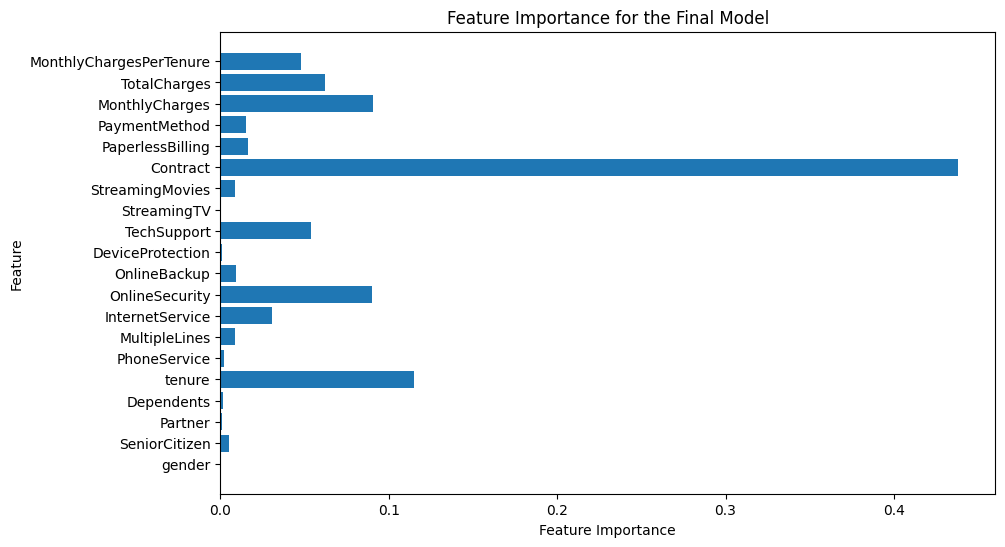

In [82]:
 # Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for the Final Model')
plt.show()

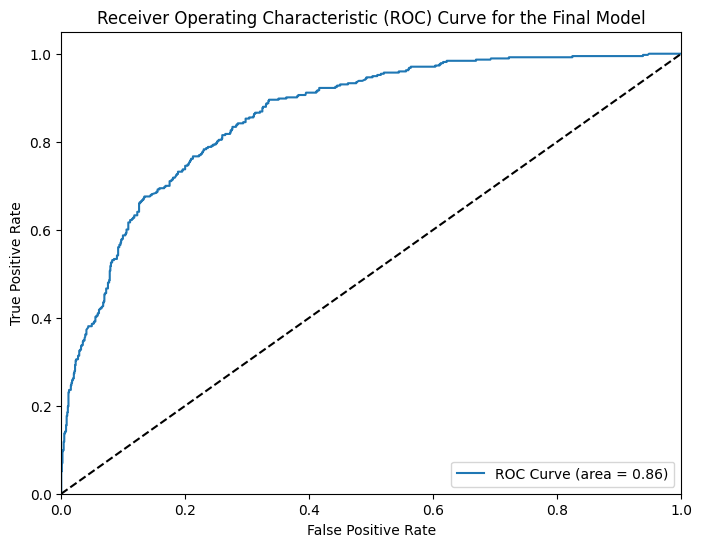

In [83]:
# 24.2. ROC Curve for the Final Model
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Final Model')
plt.legend(loc='lower right')
plt.show()

In [84]:
import joblib

# Save the final model to a file
joblib.dump(final_model, 'final_model.pkl')


['final_model.pkl']

In [85]:
import joblib

# Load the saved model and preprocessing steps
final_model = joblib.load('final_model.pkl')
